In [1]:
#importing packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import nltk
import datetime
from os import path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import f_oneway, ttest_ind
from pycaret.classification import *

Inspecting DataBase

In [2]:
df = pd.read_csv("okcupid_profiles.csv")

In [3]:
df.shape

(59946, 31)

In [4]:
df.isnull().any()

age            False
status         False
sex            False
orientation    False
body_type       True
diet            True
drinks          True
drugs           True
education       True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
pets            True
religion        True
sign            True
smokes          True
speaks          True
essay0          True
essay1          True
essay2          True
essay3          True
essay4          True
essay5          True
essay6          True
essay7          True
essay8          True
essay9          True
dtype: bool

In [5]:
df.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

<AxesSubplot:>

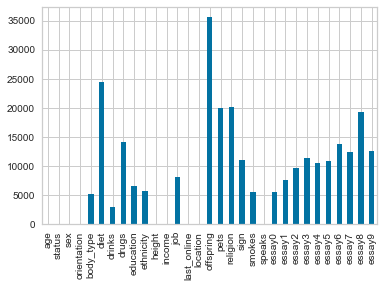

In [6]:
df.isna().sum().plot(kind='bar')

In [7]:
#changing inches to cm in height
h=df.height
h*= 2.54
df.height = h.round(0)

In [8]:
df.describe()

,age,height,income
count,59946.000000,59943.00000,59946.000000
mean,32.340290,173.45997,20033.222534
std,9.452779,10.10919,97346.192104
min,18.000000,3.00000,-1.000000
25%,26.000000,168.00000,-1.000000
50%,30.000000,173.00000,-1.000000
75%,37.000000,180.00000,-1.000000
max,110.000000,241.00000,1000000.000000


In [9]:
incomena = df.income.loc[df.income == -1].count()
heightna = df.height.loc[df.height < 65].count()
print("There are " + str(incomena) + " missing values in the Income column")
print("There are " + str(heightna)  + " missing values in the Height column")

There are 48442 missing values in the Income column
There are 6 missing values in the Height column


In [10]:
df.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

Separating the dataframe to statistical data, free-text data and label

In [11]:
statd = df[df.columns[:21]].copy(deep = True)

In [12]:
df["Profile"]=(df["essay0"].str.cat(df.iloc[:,-10:-1].astype(str),sep=" "))
df=df.drop(df.iloc[:,-11:-1], axis=1)
df["Profile"]=df["Profile"].fillna("Not provided")
df.head(10)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,Profile
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . . i wo...
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...
5,29,single,m,straight,average,mostly anything,socially,NaN,graduated from college/university,white,...,computer / hardware / software,2012-06-29-19-18,"san francisco, california","doesn't have kids, but might want them",likes cats,atheism,taurus,no,"english (fluently), chinese (okay)","i'm an australian living in san francisco, but..."
6,32,single,f,straight,fit,strictly anything,socially,never,graduated from college/university,"white, other",...,NaN,2012-06-25-20-45,"san francisco, california",NaN,likes dogs and likes cats,NaN,virgo,NaN,english,life is about the little things. i love to lau...
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,...,artistic / musical / writer,2012-06-29-12-30,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,christianity,sagittarius,no,"english, spanish (okay)",Not provided
8,24,single,f,straight,NaN,strictly anything,socially,NaN,graduated from college/university,white,...,NaN,2012-06-29-23-39,"belvedere tiburon, california",doesn't have kids,likes dogs and likes cats,christianity but not too serious about it,gemini but it doesn&rsquo;t matter,when drinking,english,Not provided
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,...,student,2012-06-28-21-08,"san mateo, california",NaN,likes dogs and likes cats,atheism and laughing about it,cancer but it doesn&rsquo;t matter,no,english (fluently),my names jake. i'm a creative guy and i look f...


In [13]:
statd.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


Cleaning the data, replacing missing values, plotting the results

Text(0, 0.5, 'Count of Missing Values')

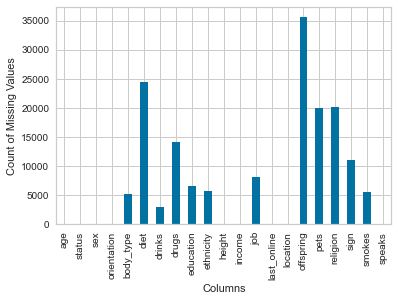

In [14]:
statd.isna().sum().plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')

In [15]:
statd.shape

(59946, 21)

In [77]:
statd.height = statd.height.fillna(0)
statd = statd.fillna("N/A")
statd = statd.query("height >= 65") #drop(statd[statd['height'] < 65].index)

In [78]:
statd.isna().sum()

age                 0
status              0
sex                 0
orientation         0
body_type           0
diet                0
drinks              0
drugs               0
height              0
income              0
job                 0
smokes              0
asian               0
white               0
black               0
other               0
hispanic / latin    0
pacific islander    0
native american     0
middle eastern      0
indian              0
location            0
sign                0
religion            0
education           0
offspring           0
lang_spoken         0
dtype: int64

In [17]:
statd.height.isna().sum()

0

In [18]:
statd.offspring.isna().sum()

0

In [19]:
mean = statd['income'].replace(-1, None).mean()
statd['income'] = statd['income'].replace(-1, mean)
statd["body_type"] = statd["body_type"].replace("N/A", "rather not say")

In [20]:
statd.query("income != -1").count()

age            59937
status         59937
sex            59937
orientation    59937
body_type      59937
diet           59937
drinks         59937
drugs          59937
education      59937
ethnicity      59937
height         59937
income         59937
job            59937
last_online    59937
location       59937
offspring      59937
pets           59937
religion       59937
sign           59937
smokes         59937
speaks         59937
dtype: int64

Initial statistical inspection

In [21]:
statd.smokes.describe()

count     59937
unique        6
top          no
freq      43892
Name: smokes, dtype: object

In [22]:
statd.drinks.describe()

count        59937
unique           7
top       socially
freq         41777
Name: drinks, dtype: object

In [23]:
statd.diet.describe()

count     59937
unique       19
top         N/A
freq      24389
Name: diet, dtype: object

In [24]:
statd['height'].groupby(statd['body_type']).describe()

,count,mean,std,min,25%,50%,75%,max
body_type,,,,,,,,
a little extra,2629.0,174.782807,9.939754,140.0,168.0,175.0,183.0,216.0
athletic,11818.0,177.041208,8.938475,91.0,170.0,178.0,183.0,241.0
average,14652.0,172.973382,9.746558,91.0,165.0,173.0,180.0,241.0
curvy,3924.0,165.655199,7.719735,91.0,160.0,165.0,170.0,241.0
fit,12710.0,174.108812,9.427296,107.0,168.0,175.0,180.0,241.0
full figured,1009.0,168.862240,8.524117,147.0,163.0,168.0,173.0,203.0
jacked,421.0,175.971496,14.874527,94.0,168.0,178.0,183.0,241.0
overweight,444.0,175.112613,10.687683,150.0,168.0,175.0,183.0,241.0
rather not say,5488.0,171.747449,10.496304,66.0,165.0,173.0,180.0,241.0


In [25]:
statd['age'].groupby(statd['body_type']).describe()

,count,mean,std,min,25%,50%,75%,max
body_type,,,,,,,,
a little extra,2629.0,34.123621,11.351363,18.0,26.0,31.0,41.0,69.0
athletic,11818.0,32.048824,8.628996,18.0,26.0,30.0,36.0,109.0
average,14652.0,32.642097,9.939800,18.0,26.0,30.0,37.0,69.0
curvy,3924.0,32.055046,9.661728,18.0,25.0,30.0,37.0,69.0
fit,12710.0,33.531157,9.610460,18.0,27.0,31.0,38.0,69.0
full figured,1009.0,34.050545,10.756708,18.0,26.0,31.0,40.0,69.0
jacked,421.0,29.847981,7.589509,18.0,25.0,28.0,33.0,67.0
overweight,444.0,34.988739,11.140488,18.0,26.0,32.0,42.0,69.0
rather not say,5488.0,30.770955,8.155978,18.0,25.0,29.0,34.0,110.0


In [26]:
statd['income'].groupby(statd['body_type']).describe()

,count,mean,std,min,25%,50%,75%,max
body_type,,,,,,,,
a little extra,2629.0,96672.416903,85515.617539,20000.0,100000.000000,104319.248826,104319.248826,1000000.0
athletic,11818.0,107797.924230,94567.471507,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
average,14652.0,99835.578216,71916.849670,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
curvy,3924.0,99833.610908,77871.836458,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
fit,12710.0,105877.749582,82780.896990,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
full figured,1009.0,102198.057855,114490.866204,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
jacked,421.0,162784.115620,241523.104549,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
overweight,444.0,91356.109631,93343.642323,20000.0,50000.000000,104319.248826,104319.248826,1000000.0
rather not say,5488.0,104060.468252,69937.186942,20000.0,104319.248826,104319.248826,104319.248826,1000000.0


In [27]:
smokes_counts = statd['smokes'].value_counts()
drinks_counts = statd['drinks'].value_counts()
diet_counts = statd['diet'].value_counts()

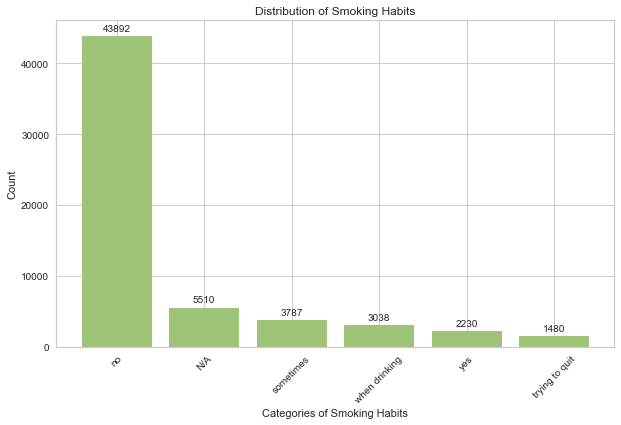

In [28]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(smokes_counts.index, smokes_counts)

# Add labels and title
plt.xlabel('Categories of Smoking Habits')
plt.ylabel('Count')
plt.title('Distribution of Smoking Habits')
bars = plt.bar(smokes_counts.index, smokes_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')


# Show the plot
plt.show()

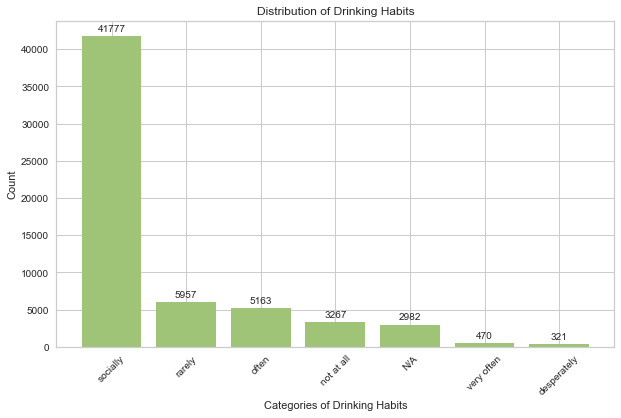

In [29]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(drinks_counts.index, drinks_counts)

# Add labels and title
plt.xlabel('Categories of Drinking Habits')
plt.ylabel('Count')
plt.title('Distribution of Drinking Habits')
bars = plt.bar(drinks_counts.index, drinks_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')


# Show the plot
plt.show()

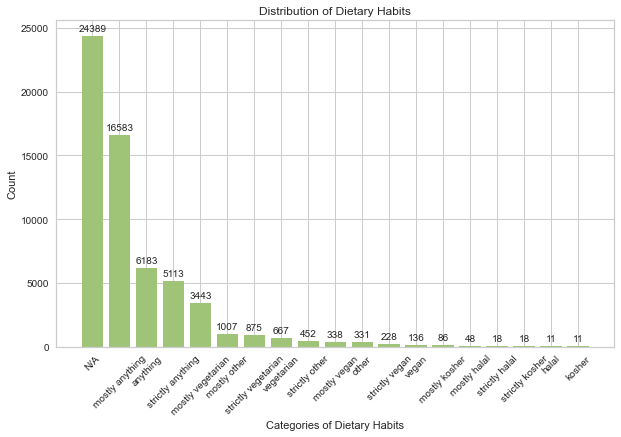

In [30]:
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(diet_counts.index, diet_counts)

# Add labels and title
plt.xlabel('Categories of Dietary Habits')
plt.ylabel('Count')
plt.title('Distribution of Dietary Habits')
bars = plt.bar(diet_counts.index, diet_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')


# Show the plot
plt.show()

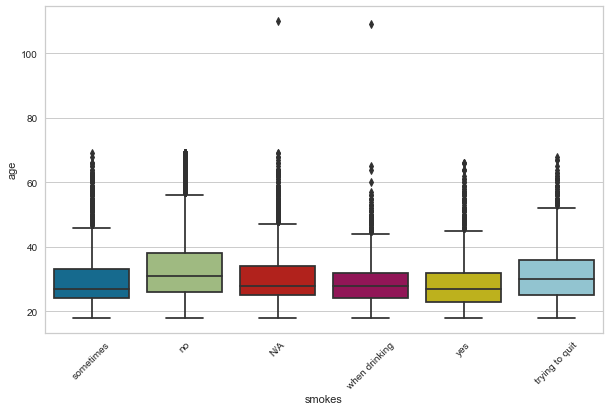

In [31]:
# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.xticks(rotation=45)
# Create the boxplot
sns.boxplot(x='smokes', y='age', data=statd)

# Show the plot
plt.show()

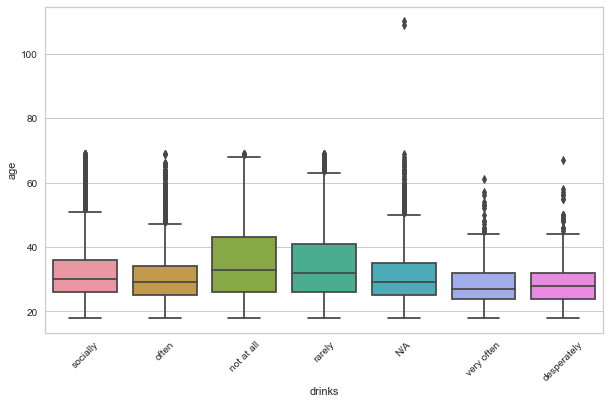

In [32]:
# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.xticks(rotation=45)
# Create the boxplot
sns.boxplot(x='drinks', y='age', data=statd)

# Show the plot
plt.show()

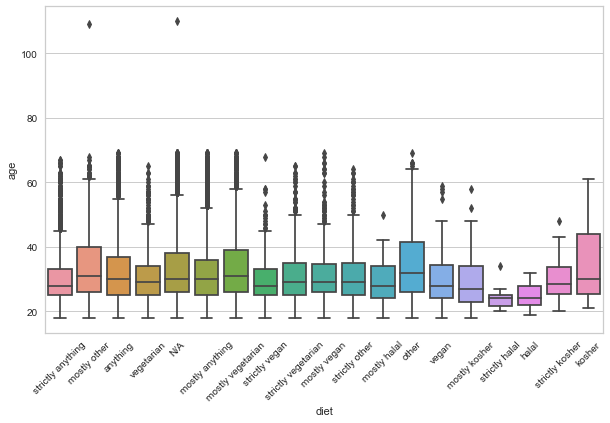

In [33]:
# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.xticks(rotation=45)
# Create the boxplot
sns.boxplot(x='diet', y='age', data=statd)

# Show the plot
plt.show()

In [34]:
statd['height'].groupby(statd['smokes']).describe()

,count,mean,std,min,25%,50%,75%,max
smokes,,,,,,,,
N/A,5510.0,174.037024,10.239450,91.0,168.0,175.0,180.0,241.0
no,43892.0,173.215324,9.914094,66.0,165.0,173.0,180.0,241.0
sometimes,3787.0,174.085820,9.993991,91.0,168.0,175.0,180.0,241.0
trying to quit,1480.0,174.917568,9.848066,107.0,168.0,175.0,183.0,211.0
when drinking,3038.0,173.963792,10.064494,135.0,168.0,175.0,180.0,241.0
yes,2230.0,174.564126,10.332262,124.0,168.0,175.0,183.0,241.0


In [35]:
statd['height'].groupby(statd['drinks']).describe()

,count,mean,std,min,25%,50%,75%,max
drinks,,,,,,,,
N/A,2982.0,173.941315,10.913043,91.0,168.0,175.0,180.0,241.0
desperately,321.0,175.214953,13.414098,119.0,168.0,175.0,183.0,241.0
not at all,3267.0,173.382614,10.212736,109.0,168.0,173.0,180.0,239.0
often,5163.0,174.866938,9.858055,94.0,168.0,175.0,183.0,241.0
rarely,5957.0,172.686587,10.104806,91.0,165.0,173.0,180.0,229.0
socially,41777.0,173.363573,9.825065,66.0,165.0,173.0,180.0,241.0
very often,470.0,174.706383,11.216372,124.0,168.0,175.0,183.0,241.0


In [36]:
statd['height'].groupby(statd['diet']).describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
N/A,24389.0,173.322645,9.978647,66.0,165.00,173.0,180.0,241.0
anything,6183.0,173.472586,9.881186,91.0,168.00,173.0,180.0,226.0
halal,11.0,175.727273,12.034043,150.0,171.50,180.0,183.0,188.0
kosher,11.0,171.090909,10.104005,152.0,164.00,170.0,179.0,185.0
mostly anything,16583.0,173.642345,9.889126,91.0,168.00,173.0,180.0,241.0
mostly halal,48.0,175.791667,11.127804,150.0,168.00,178.0,183.0,211.0
mostly kosher,86.0,173.569767,11.067218,152.0,165.75,173.0,183.0,201.0
mostly other,1007.0,173.611718,10.888792,94.0,168.00,173.0,180.0,241.0
mostly vegan,338.0,172.449704,9.575507,147.0,165.00,173.0,178.0,201.0


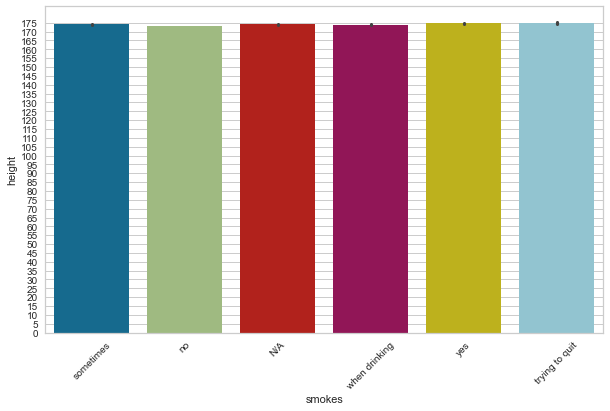

In [37]:
y_ticks = list(range(0, 176, 5))

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='smokes', y='height', data=statd, estimator=np.mean)

# Set the y-axis ticks and labels
plt.yticks(y_ticks, y_ticks)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [38]:
statd['height'].groupby(statd['orientation']).describe()

,count,mean,std,min,25%,50%,75%,max
orientation,,,,,,,,
bisexual,2767.0,169.298518,9.797432,91.0,163.0,168.0,175.0,241.0
gay,5573.0,174.359591,9.261742,91.0,168.0,175.0,180.0,241.0
straight,51597.0,173.604609,10.014317,66.0,168.0,173.0,180.0,241.0


In [39]:
statd['income'].groupby(statd['orientation']).describe()

,count,mean,std,min,25%,50%,75%,max
orientation,,,,,,,,
bisexual,2767.0,105865.235989,122558.953358,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
gay,5573.0,102434.356122,77718.175945,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
straight,51597.0,104439.929497,87019.686877,20000.0,104319.248826,104319.248826,104319.248826,1000000.0


In [40]:
statd['age'].groupby(statd['orientation']).describe()

,count,mean,std,min,25%,50%,75%,max
orientation,,,,,,,,
bisexual,2767.0,29.318395,8.167943,18.0,23.0,27.0,33.0,69.0
gay,5573.0,32.228602,9.404589,18.0,25.0,30.0,37.0,69.0
straight,51597.0,32.514371,9.494988,18.0,26.0,30.0,37.0,110.0


In [41]:
statd['age'].groupby(statd['sex']).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,24113.0,32.818728,10.026071,18.0,26.0,30.0,37.0,110.0
m,35824.0,32.018200,9.032813,18.0,26.0,30.0,36.0,109.0


In [42]:
statd['height'].groupby(statd['sex']).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,24113.0,165.415626,7.296074,91.0,160.0,165.0,170.0,241.0
m,35824.0,178.901435,7.595522,66.0,173.0,178.0,183.0,241.0


In [43]:
statd['income'].groupby(statd['sex']).describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,24113.0,102036.006526,68486.069049,20000.0,104319.248826,104319.248826,104319.248826,1000000.0
m,35824.0,105856.090653,99215.720257,20000.0,104319.248826,104319.248826,104319.248826,1000000.0


In [44]:
for col in statd:
    print(statd[col].unique())

[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
['single' 'available' 'seeing someone' 'married' 'unknown']
['m' 'f']
['straight' 'bisexual' 'gay']
['a little extra' 'average' 'thin' 'athletic' 'fit' 'rather not say'
 'skinny' 'curvy' 'full figured' 'jacked' 'used up' 'overweight']
['strictly anything' 'mostly other' 'anything' 'vegetarian' 'N/A'
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
['socially' 'often' 'not at all' 'rarely' 'N/A' 'very often' 'desperately']
['never' 'sometimes' 'N/A' 'often']
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year colle

Transforming statistical data to be eligible for statistical analysis

In [45]:
#separating ethnical orientation to categories
temp_df = pd.DataFrame()
temp_df['str_list'] = statd["ethnicity"].str.split(',')
temp_df = temp_df.explode('str_list')
temp_df['str_list'] = temp_df['str_list'].str.strip()

In [46]:
#temp_df['str_list'].replace(np.nan, "Not specified")
eth_list = temp_df['str_list'].unique()
print(eth_list)

['asian' 'white' 'N/A' 'black' 'other' 'hispanic / latin'
 'pacific islander' 'native american' 'middle eastern' 'indian']


In [47]:
#creating dummies for each ethnical category
eth_dmy = pd.DataFrame()

for value in eth_list:
    eth_dmy[value] = statd['ethnicity'].apply(lambda x: 1 if value in x else 0)

statd = pd.concat([statd, eth_dmy], axis=1)
statd = statd.drop("ethnicity", axis=1)

In [48]:
diet = statd.diet.str.split(" ")
diet = diet.apply(lambda x: x[-1] )

In [49]:
statd.diet = diet

In [50]:
#simplifying location data to state
location = statd["location"].str.split(",")
location = location.apply(lambda x: x[-1] )
location = location.str.strip()
location

0        california
1        california
2        california
3        california
4        california
            ...    
59941    california
59942    california
59943    california
59944    california
59945    california
Name: location, Length: 59937, dtype: object

In [51]:
#concating simplified state variable to the dataframe
statd = statd.drop("location", axis=1)
statd = pd.concat([statd, location], axis=1)

In [52]:
#separating astrological signs to two categorical column: sign = actual sign, sign seriousness = how serious the user is about their own astrological sign (handled as totally independent data from sign)
signs = statd["sign"].str.split(" ")
sign = pd.DataFrame()
sign = signs.apply(lambda x: x[0] )

In [53]:
statd = statd.drop("sign", axis=1)
statd = pd.concat([statd, sign], axis=1)

In [54]:
#simplifying religious input quite similarly to astrological signs
religion = pd.DataFrame()
religions = statd["religion"].str.split(" ")
religion = religions.apply(lambda x: x[0] )

In [55]:
statd = statd.drop("religion", axis=1)
statd = pd.concat([statd, religion], axis=1)

In [56]:
#using NLP toolkit to tokenize educational input since this column had various inputs
#after gathering the information, I could create 3 separate string arrays which would describe the aspects I found relevant for separating and simplifying inputs to 3 ctageires
#the 3 categories are: not graduated (either still in high school or dropped), graduated (graduated from high school, university), post graduate (currently on masters or phd)
ed_column = statd["education"]
modified_token_list=[]
lemmatizer=WordNetLemmatizer()
to_be_removed = set(stopwords.words('english'))
for edu in ed_column:
    tokenized_edu=word_tokenize(edu)
    token_list=[word for word in tokenized_edu if not word in to_be_removed]
    token_list = [lemmatizer.lemmatize(i) for i in token_list] 
    modified_token_list = modified_token_list + token_list
edu_words = list(np.unique(np.array(modified_token_list)))

In [57]:
edu_words

['N/A',
 'camp',
 'college',
 'college/university',
 'dropped',
 'graduated',
 'high',
 'law',
 'master',
 'med',
 'ph.d',
 'program',
 'school',
 'space',
 'two-year',
 'working']

In [58]:
graduate_words = ['university', 'college']
postgraduate_words = ['masters', 'ph.d']

In [59]:
# #creating the dummy columns with the previously described grouping aspects
# education_df = pd.DataFrame()
# for g in range(2):
#     n = g
#     if g > 1:
#         g = 1
#     education_df['graduated'] = ed_column.apply(lambda x: 1 if graduate_words[g] in x and nongraduate_words[n] not in x else 0)
#     education_df['not graduated'] = ed_column.apply(lambda x: 1 if nongraduate_words[n] in x else 0)
#     education_df['post graduate'] = ed_column.apply(lambda x: 1 if graduate_words[1] in x and graduate_words[0] in x  and nongraduate_words[n] not in x else 0)
#     education_df['graduated'] = education_df.apply(lambda row: 0 if row['not graduated'] == 1 or row['post graduate'] == 1 else 1, axis = 1)


In [60]:
# level_mapping = {
#     'graduated': 'Graduated',
#     'not graduated': 'Not Graduated',
#     'post graduate': 'Post Graduate'
# }

# # Create a new DataFrame with the same index as the original data
# education = pd.DataFrame(index=statd.index)

# # Iterate through the dummy columns and fill the "education" DataFrame
# for dummy_col, education_level in level_mapping.items():
#     mask = education_df[dummy_col] == 1
#     education.loc[mask, 'education'] = education_level

# # Reset the index of the "education" DataFrame
# education.reset_index(drop=True, inplace=True)

# # Concatenate the "education" DataFrame with the "statd" DataFrame
# statd = pd.concat([statd, education], axis=1)
# # Rename the column to "education"
# education.columns = ['education']

In [61]:
for w in range(0, 1):
    education = ed_column.apply(lambda x: "Post Graduate" if 'graduated' in x and postgraduate_words[w] in x else x)
    education = education.apply(lambda x: "Graduated" if 'graduated' in x and graduate_words[w] in x else x)
    education = education.apply(lambda x: "Graduated" if postgraduate_words[w] in x else x)
    education = education.apply(lambda x: "N/A" if x == 'N/A' else x)
    education = education.apply(lambda x: "Not Graduated" if x != "Graduated" and x != "Post Graduate" and x != "N/A" else x)

In [62]:
education.unique()

array(['Not Graduated', 'Post Graduate', 'Graduated', 'N/A'], dtype=object)

In [63]:
statd = statd.drop("education", axis = 1)
statd = pd.concat([statd, education], axis=1)

In [64]:
#simplifying offspring input based on the fact, whether the user has kids or not
# kid_column = statd["offspring"]
# kids_df = pd.DataFrame()

# kids_df["has kids"] = kid_column.apply(lambda x: 1 if 'has' in x and x != "N/A" else 0)
# kids_df["no kids"] = kid_column.apply(lambda x: 0 if 'has' in x and x != "N/A" else 1)
# kids_df["N/A"] = kid_column.apply(lambda x: 1 if x == "N/A" else 0)

In [65]:
# level_mapping = {
#     'has kids': 'Has Kids',
#     'no kids': 'No Kids'
# }

# # Initialize a new DataFrame for the "education" column
# kids = pd.DataFrame(index=statd.index)

# # Iterate through the dummy columns and concatenate them into the "education" DataFrame
# for dummy_col, education_level in level_mapping.items():
#     mask = kids_df[dummy_col] == 1
#     kids.loc[mask, 'kids'] = education_level

# # Rename the column to "education"
# kids.columns = ['kids']

In [66]:
kid_column = statd["offspring"]
kids = kid_column.apply(lambda x: "Has Kids" if 'has' in x and x != "N/A" else x)
kids = kids.apply(lambda x: "No Kids" if 'has' not in x.lower() and x != "N/A" else x)
kids

0         No Kids
1         No Kids
2             N/A
3         No Kids
4             N/A
           ...   
59941    Has Kids
59942     No Kids
59943     No Kids
59944     No Kids
59945         N/A
Name: offspring, Length: 59937, dtype: object

In [67]:
kids.unique()

array(['No Kids', 'N/A', 'Has Kids'], dtype=object)

In [68]:
# simplifying pets column based on the fact, whether the user prefers cats, dogs, both or none
# pets = statd["pets"]
# pets_df = pd.DataFrame()

# pets_df["dogs"] = pets.apply(lambda x: 1 if 'likes dogs' in x or 'has dogs' in x else 0)
# pets_df["cats"] = pets.apply(lambda x: 1 if 'has cats' in x or 'likes cats' in x else 0)
# pets_df["both cats and dogs"] = pets_df.apply(lambda row: 1 if row['cats'] == 1 and row['dogs'] == 1 else 0, axis = 1)
# pets_df["no pets"] = pets_df.apply(lambda row: 0 if row['cats'] == 1 or row['dogs'] == 1 else 1, axis = 1)
# pets_df["dogs"] = pets_df.apply(lambda row: row['dogs'] if row['both cats and dogs'] == 0 else 0, axis = 1)
# pets_df["cats"] = pets_df.apply(lambda row: row['cats'] if row['both cats and dogs'] == 0 else 0, axis = 1)

In [69]:
#categorizing users based on the fact whether they were active in the past approx. 2 months or not
#for this I had to convert the date column from string datatype to a specifically formatted date
# dates = statd["last_online"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d-%H-%M'))
# max = dates.max()
# min = dates.min()
# threshold = pd.to_timedelta(60, unit='d')

In [70]:
#comparing the time passed between the last acctive user and every other user
#separating categories by a 60 days threshold
# statd["active"] = dates.apply(lambda x: 1 if max-x < threshold else 0)
# statd["inactive"] = dates.apply(lambda x: 0 if max-x < threshold else 1)
statd = statd.drop("last_online", axis = 1)

In [71]:
#replacing old columns with the simplified ones
statd = statd.drop("pets", axis=1)
statd = statd.drop("offspring", axis=1)
statd = pd.concat([statd, kids], axis=1)
#statd = pd.concat([statd, pets_df], axis=1)

In [72]:
#I found languages input very irrelevant, with little variety in inputs, however it was still too many irrelevant columns to be converted to dummy therefore I added a new column instead
#simply counting the number of languages spoken by the person
language = statd["speaks"].str.split(',')
statd["lang_spoken"] = [len(value) for value in language]

In [73]:
statd = statd.drop("speaks", axis = 1)

In [74]:
statd.dtypes

age                   int64
status               object
sex                  object
orientation          object
body_type            object
diet                 object
drinks               object
drugs                object
height              float64
income              float64
job                  object
smokes               object
asian                 int64
white                 int64
N/A                   int64
black                 int64
other                 int64
hispanic / latin      int64
pacific islander      int64
native american       int64
middle eastern        int64
indian                int64
location             object
sign                 object
religion             object
education            object
offspring            object
lang_spoken           int64
dtype: object

Exporting the transformed dataset

In [75]:
statd = statd.drop("N/A", axis = 1)

In [79]:
statd.isna().sum()

age                 0
status              0
sex                 0
orientation         0
body_type           0
diet                0
drinks              0
drugs               0
height              0
income              0
job                 0
smokes              0
asian               0
white               0
black               0
other               0
hispanic / latin    0
pacific islander    0
native american     0
middle eastern      0
indian              0
location            0
sign                0
religion            0
education           0
offspring           0
lang_spoken         0
dtype: int64

In [81]:
statd.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,income,...,pacific islander,native american,middle eastern,indian,location,sign,religion,education,offspring,lang_spoken
0,22,single,m,straight,a little extra,anything,socially,never,190.0,104319.248826,...,0,0,0,0,california,gemini,agnosticism,Not Graduated,No Kids,1
1,35,single,m,straight,average,other,often,sometimes,178.0,80000.000000,...,0,0,0,0,california,cancer,agnosticism,Not Graduated,No Kids,3
2,38,available,m,straight,thin,anything,socially,N/A,173.0,104319.248826,...,0,0,0,0,california,pisces,N/A,Post Graduate,N/A,3
3,23,single,m,straight,thin,vegetarian,socially,N/A,180.0,20000.000000,...,0,0,0,0,california,pisces,N/A,Not Graduated,No Kids,2
4,29,single,m,straight,athletic,N/A,socially,never,168.0,104319.248826,...,0,0,0,0,california,aquarius,N/A,Graduated,N/A,1


In [83]:
na_count = (statd['diet'] == 'N/A').sum()
print(na_count)

24389


In [80]:
statd.to_csv('statd.csv', index=False)